In [1]:
!pip install nnetsauce tisthemachinelearner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 3.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd

from functools import partial
from sklearn.utils.discovery import all_estimators
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from tisthemachinelearner import FiniteDiffRegressor


# Data set
df = pd.read_csv("https://raw.githubusercontent.com/Techtonique/datasets/refs/heads/main/tabular/regression/boston_dataset2.csv")
assert 'training_index' in df.columns, \
"must have a column 'training_index' specifying which sample belongs to the training set"
X_train = df[df['training_index'] == 1].drop(columns=['target', 'training_index'],
                axis=1)
y_train = df[df['training_index'] == 1]['target'].values
X_test = df[df['training_index'] == 0].drop(columns=['target', 'training_index'],
                axis=1)
y_test = df[df['training_index'] == 0]['target'].values


results = []

lrs = [1e-4, 1e-3, 1e-2, 1e-1]
optimizers = ["gd", "sgd", "adam", "cd"]

for estimator in tqdm(all_estimators(type_filter='regressor') + [("GBDTRegressor", 0)]):
  for lr in lrs:
    for opt in optimizers:
      try:
        if estimator[0] == "GBDTRegressor":
          regr = FiniteDiffRegressor(estimator[0], model_type=estimator[1], lr=lr, optimizer=opt)
          regr.fit(X_train, y_train, verbose=False, show_progress=False)
          y_pred = regr.predict(X_test)
          rmse = np.sqrt(np.mean((y_test - y_pred)**2))
          print(f"{model_type}: lr = {lr}, opt = {opt}, RMSE = {rmse}")
          results.append([model_type, lr, opt, rmse])
        else:
          regr = FiniteDiffRegressor(estimator[0], lr=lr, optimizer=opt)
          regr.fit(X_train, y_train, verbose=False, show_progress=False)
          y_pred = regr.predict(X_test)
          rmse = np.sqrt(np.mean((y_test - y_pred)**2))
          print(f"{estimator[0]}: lr = {lr}, opt = {opt}, RMSE = {rmse}")
          results.append([estimator[0], lr, opt, rmse])
      except Exception as e:
          continue

  0%|          | 0/56 [00:00<?, ?it/s]

ARDRegression: lr = 0.0001, opt = gd, RMSE = 4.446442267068818
ARDRegression: lr = 0.0001, opt = sgd, RMSE = 4.449823847828521
ARDRegression: lr = 0.0001, opt = adam, RMSE = 4.447661004888755
ARDRegression: lr = 0.0001, opt = cd, RMSE = 4.447419850047652
ARDRegression: lr = 0.001, opt = gd, RMSE = 4.437093244278806
ARDRegression: lr = 0.001, opt = sgd, RMSE = 4.488271182761813
ARDRegression: lr = 0.001, opt = adam, RMSE = 4.442456001144893
ARDRegression: lr = 0.001, opt = cd, RMSE = 4.4475175366008
ARDRegression: lr = 0.01, opt = gd, RMSE = 4.354923245384043
ARDRegression: lr = 0.01, opt = sgd, RMSE = 4.617594976999916
ARDRegression: lr = 0.01, opt = adam, RMSE = 4.277999231732042
ARDRegression: lr = 0.01, opt = cd, RMSE = 4.448582453923792
ARDRegression: lr = 0.1, opt = gd, RMSE = 15.484998112883966
ARDRegression: lr = 0.1, opt = sgd, RMSE = 8.056079797129698
ARDRegression: lr = 0.1, opt = adam, RMSE = 4.105521927379044


  2%|▏         | 1/56 [00:35<32:46, 35.75s/it]

ARDRegression: lr = 0.1, opt = cd, RMSE = 4.465792536760786
AdaBoostRegressor: lr = 0.0001, opt = gd, RMSE = 3.8854800396349525
AdaBoostRegressor: lr = 0.0001, opt = sgd, RMSE = 3.8854800396349525
AdaBoostRegressor: lr = 0.0001, opt = adam, RMSE = 3.8854800396349525
AdaBoostRegressor: lr = 0.0001, opt = cd, RMSE = 3.8854800396349525
AdaBoostRegressor: lr = 0.001, opt = gd, RMSE = 3.8854800396349525
AdaBoostRegressor: lr = 0.001, opt = sgd, RMSE = 3.8854800396349525
AdaBoostRegressor: lr = 0.001, opt = adam, RMSE = 3.8854800396349525
AdaBoostRegressor: lr = 0.001, opt = cd, RMSE = 3.8854800396349525
AdaBoostRegressor: lr = 0.01, opt = gd, RMSE = 3.8854800396349525
AdaBoostRegressor: lr = 0.01, opt = sgd, RMSE = 3.8854800396349525
AdaBoostRegressor: lr = 0.01, opt = adam, RMSE = 3.8854800396349525
AdaBoostRegressor: lr = 0.01, opt = cd, RMSE = 3.8854800396349525
AdaBoostRegressor: lr = 0.1, opt = gd, RMSE = 3.8854800396349525
AdaBoostRegressor: lr = 0.1, opt = sgd, RMSE = 3.8854800396349

  4%|▎         | 2/56 [05:17<2:42:39, 180.73s/it]

AdaBoostRegressor: lr = 0.1, opt = cd, RMSE = 3.8854800396349525
BaggingRegressor: lr = 0.0001, opt = gd, RMSE = 3.2100686580622675
BaggingRegressor: lr = 0.0001, opt = sgd, RMSE = 3.2100686580622675
BaggingRegressor: lr = 0.0001, opt = adam, RMSE = 3.2100686580622675
BaggingRegressor: lr = 0.0001, opt = cd, RMSE = 3.2100686580622675
BaggingRegressor: lr = 0.001, opt = gd, RMSE = 3.2100686580622675
BaggingRegressor: lr = 0.001, opt = sgd, RMSE = 3.2100686580622675
BaggingRegressor: lr = 0.001, opt = adam, RMSE = 3.2141724604107913
BaggingRegressor: lr = 0.001, opt = cd, RMSE = 3.2100686580622675
BaggingRegressor: lr = 0.01, opt = gd, RMSE = 3.2092975539008046
BaggingRegressor: lr = 0.01, opt = sgd, RMSE = 3.2100686580622675
BaggingRegressor: lr = 0.01, opt = adam, RMSE = 3.191653176646861
BaggingRegressor: lr = 0.01, opt = cd, RMSE = 3.2100686580622675
BaggingRegressor: lr = 0.1, opt = gd, RMSE = 3.2127238812014496
BaggingRegressor: lr = 0.1, opt = sgd, RMSE = 3.2100686580622675
Baggin

  5%|▌         | 3/56 [06:58<2:07:20, 144.17s/it]

BaggingRegressor: lr = 0.1, opt = cd, RMSE = 3.2094812255007987
BayesianRidge: lr = 0.0001, opt = gd, RMSE = 4.573995137503531
BayesianRidge: lr = 0.0001, opt = sgd, RMSE = 4.574355992814854
BayesianRidge: lr = 0.0001, opt = adam, RMSE = 4.574831982288727
BayesianRidge: lr = 0.0001, opt = cd, RMSE = 4.574108358537029
BayesianRidge: lr = 0.001, opt = gd, RMSE = 4.5729871795012675
BayesianRidge: lr = 0.001, opt = sgd, RMSE = 4.577407642402872
BayesianRidge: lr = 0.001, opt = adam, RMSE = 4.574803117506482
BayesianRidge: lr = 0.001, opt = cd, RMSE = 4.574122213645309
BayesianRidge: lr = 0.01, opt = gd, RMSE = 4.561804323285848
BayesianRidge: lr = 0.01, opt = sgd, RMSE = 4.6426344210646455
BayesianRidge: lr = 0.01, opt = adam, RMSE = 4.471636636545466
BayesianRidge: lr = 0.01, opt = cd, RMSE = 4.574261331021186
BayesianRidge: lr = 0.1, opt = gd, RMSE = 4.473634553501872
BayesianRidge: lr = 0.1, opt = sgd, RMSE = 4.744855619814151
BayesianRidge: lr = 0.1, opt = adam, RMSE = 4.28664577317313

  7%|▋         | 4/56 [07:27<1:25:30, 98.66s/it] 

BayesianRidge: lr = 0.1, opt = cd, RMSE = 4.57570144240747
DecisionTreeRegressor: lr = 0.0001, opt = gd, RMSE = 3.192147025370064
DecisionTreeRegressor: lr = 0.0001, opt = sgd, RMSE = 3.192147025370064
DecisionTreeRegressor: lr = 0.0001, opt = adam, RMSE = 3.192147025370064
DecisionTreeRegressor: lr = 0.0001, opt = cd, RMSE = 3.192147025370064
DecisionTreeRegressor: lr = 0.001, opt = gd, RMSE = 3.192147025370064
DecisionTreeRegressor: lr = 0.001, opt = sgd, RMSE = 3.192147025370064
DecisionTreeRegressor: lr = 0.001, opt = adam, RMSE = 3.192147025370064
DecisionTreeRegressor: lr = 0.001, opt = cd, RMSE = 3.192147025370064
DecisionTreeRegressor: lr = 0.01, opt = gd, RMSE = 3.192147025370064
DecisionTreeRegressor: lr = 0.01, opt = sgd, RMSE = 3.192147025370064
DecisionTreeRegressor: lr = 0.01, opt = adam, RMSE = 3.192147025370064
DecisionTreeRegressor: lr = 0.01, opt = cd, RMSE = 3.192147025370064
DecisionTreeRegressor: lr = 0.1, opt = gd, RMSE = 3.192147025370064
DecisionTreeRegressor: l

 11%|█         | 6/56 [07:58<45:30, 54.60s/it]  

DecisionTreeRegressor: lr = 0.1, opt = cd, RMSE = 3.192147025370064
ElasticNet: lr = 0.0001, opt = gd, RMSE = 5.271750090424889
ElasticNet: lr = 0.0001, opt = sgd, RMSE = 5.271747181386081
ElasticNet: lr = 0.0001, opt = adam, RMSE = 5.271582368591595
ElasticNet: lr = 0.0001, opt = cd, RMSE = 5.271752412746696
ElasticNet: lr = 0.001, opt = gd, RMSE = 5.271729147061759
ElasticNet: lr = 0.001, opt = sgd, RMSE = 5.271700089763786
ElasticNet: lr = 0.001, opt = adam, RMSE = 5.270213680855815
ElasticNet: lr = 0.001, opt = cd, RMSE = 5.271752358289646
ElasticNet: lr = 0.01, opt = gd, RMSE = 5.271530989080279
ElasticNet: lr = 0.01, opt = sgd, RMSE = 5.271277145911898
ElasticNet: lr = 0.01, opt = adam, RMSE = 5.263564214875171
ElasticNet: lr = 0.01, opt = cd, RMSE = 5.271751813935044
ElasticNet: lr = 0.1, opt = gd, RMSE = 5.26990568576546
ElasticNet: lr = 0.1, opt = sgd, RMSE = 5.2677554919274545
ElasticNet: lr = 0.1, opt = adam, RMSE = 5.24554079984547


 14%|█▍        | 8/56 [08:28<29:58, 37.48s/it]

ElasticNet: lr = 0.1, opt = cd, RMSE = 5.271746391976417
ElasticNetCV: lr = 0.0001, opt = gd, RMSE = 4.8812279165998795
ElasticNetCV: lr = 0.0001, opt = sgd, RMSE = 4.881230084177794
ElasticNetCV: lr = 0.0001, opt = adam, RMSE = 4.88141572592982
ElasticNetCV: lr = 0.0001, opt = cd, RMSE = 4.881224516399754
ElasticNetCV: lr = 0.001, opt = gd, RMSE = 4.881259530758895
ElasticNetCV: lr = 0.001, opt = sgd, RMSE = 4.881281493004411
ElasticNetCV: lr = 0.001, opt = adam, RMSE = 4.883409207417741
ElasticNetCV: lr = 0.001, opt = cd, RMSE = 4.88122552689299
ElasticNetCV: lr = 0.01, opt = gd, RMSE = 4.88158251153821
ElasticNetCV: lr = 0.01, opt = sgd, RMSE = 4.881938121265654
ElasticNetCV: lr = 0.01, opt = adam, RMSE = 4.890263634005799
ElasticNetCV: lr = 0.01, opt = cd, RMSE = 4.881235632367377
ElasticNetCV: lr = 0.1, opt = gd, RMSE = 4.884807067154108
ElasticNetCV: lr = 0.1, opt = sgd, RMSE = 4.890518755238623
ElasticNetCV: lr = 0.1, opt = adam, RMSE = 4.91788597176482


 16%|█▌        | 9/56 [08:58<28:02, 35.79s/it]

ElasticNetCV: lr = 0.1, opt = cd, RMSE = 4.881336741305012
ExtraTreeRegressor: lr = 0.0001, opt = gd, RMSE = 4.674581320965097
ExtraTreeRegressor: lr = 0.0001, opt = sgd, RMSE = 4.674581320965097
ExtraTreeRegressor: lr = 0.0001, opt = adam, RMSE = 4.674581320965097
ExtraTreeRegressor: lr = 0.0001, opt = cd, RMSE = 4.674581320965097
ExtraTreeRegressor: lr = 0.001, opt = gd, RMSE = 4.674581320965097
ExtraTreeRegressor: lr = 0.001, opt = sgd, RMSE = 4.674581320965097
ExtraTreeRegressor: lr = 0.001, opt = adam, RMSE = 4.674581320965097
ExtraTreeRegressor: lr = 0.001, opt = cd, RMSE = 4.674581320965097
ExtraTreeRegressor: lr = 0.01, opt = gd, RMSE = 4.674581320965097
ExtraTreeRegressor: lr = 0.01, opt = sgd, RMSE = 4.674581320965097
ExtraTreeRegressor: lr = 0.01, opt = adam, RMSE = 4.674581320965097
ExtraTreeRegressor: lr = 0.01, opt = cd, RMSE = 4.674581320965097
ExtraTreeRegressor: lr = 0.1, opt = gd, RMSE = 4.674581320965097
ExtraTreeRegressor: lr = 0.1, opt = sgd, RMSE = 4.6745813209650

 18%|█▊        | 10/56 [09:30<26:35, 34.68s/it]

ExtraTreeRegressor: lr = 0.1, opt = cd, RMSE = 4.674581320965097
ExtraTreesRegressor: lr = 0.0001, opt = gd, RMSE = 3.16211706023537
ExtraTreesRegressor: lr = 0.0001, opt = sgd, RMSE = 3.1617590894110963
ExtraTreesRegressor: lr = 0.0001, opt = adam, RMSE = 3.161484906778692
ExtraTreesRegressor: lr = 0.0001, opt = cd, RMSE = 3.1618713698078436
ExtraTreesRegressor: lr = 0.001, opt = gd, RMSE = 3.1614559062824874
ExtraTreesRegressor: lr = 0.001, opt = sgd, RMSE = 3.1585797389183106
ExtraTreesRegressor: lr = 0.001, opt = adam, RMSE = 3.1595944016431505
ExtraTreesRegressor: lr = 0.001, opt = cd, RMSE = 3.162229686804117
ExtraTreesRegressor: lr = 0.01, opt = gd, RMSE = 3.1782419865390996
ExtraTreesRegressor: lr = 0.01, opt = sgd, RMSE = 3.1607539448682185
ExtraTreesRegressor: lr = 0.01, opt = adam, RMSE = 3.164435070559906
ExtraTreesRegressor: lr = 0.01, opt = cd, RMSE = 3.1619921528998143
ExtraTreesRegressor: lr = 0.1, opt = gd, RMSE = 3.11068043834041
ExtraTreesRegressor: lr = 0.1, opt = s

 21%|██▏       | 12/56 [16:18<1:11:07, 96.98s/it] 

ExtraTreesRegressor: lr = 0.1, opt = cd, RMSE = 3.1633966920983765
GaussianProcessRegressor: lr = 0.0001, opt = gd, RMSE = 5.047990094771302
GaussianProcessRegressor: lr = 0.0001, opt = sgd, RMSE = 5.0479915118369245
GaussianProcessRegressor: lr = 0.0001, opt = adam, RMSE = 5.048059069800015
GaussianProcessRegressor: lr = 0.0001, opt = cd, RMSE = 5.047990917853023
GaussianProcessRegressor: lr = 0.001, opt = gd, RMSE = 5.048606283518688
GaussianProcessRegressor: lr = 0.001, opt = sgd, RMSE = 5.0469252192991005
GaussianProcessRegressor: lr = 0.001, opt = adam, RMSE = 5.048522947770363
GaussianProcessRegressor: lr = 0.001, opt = cd, RMSE = 5.047990898537576
GaussianProcessRegressor: lr = 0.01, opt = gd, RMSE = 5.047450395445548
GaussianProcessRegressor: lr = 0.01, opt = sgd, RMSE = 5.03902261667107
GaussianProcessRegressor: lr = 0.01, opt = adam, RMSE = 5.050658439600574
GaussianProcessRegressor: lr = 0.01, opt = cd, RMSE = 5.047991578843135
GaussianProcessRegressor: lr = 0.1, opt = gd, R

 23%|██▎       | 13/56 [19:21<1:26:50, 121.17s/it]

GaussianProcessRegressor: lr = 0.1, opt = cd, RMSE = 5.049509094940599
GradientBoostingRegressor: lr = 0.0001, opt = gd, RMSE = 2.771768034812214
GradientBoostingRegressor: lr = 0.0001, opt = sgd, RMSE = 2.771768034812214
GradientBoostingRegressor: lr = 0.0001, opt = adam, RMSE = 2.771768034812214
GradientBoostingRegressor: lr = 0.0001, opt = cd, RMSE = 2.771768034812214
GradientBoostingRegressor: lr = 0.001, opt = gd, RMSE = 2.771768034812214
GradientBoostingRegressor: lr = 0.001, opt = sgd, RMSE = 2.771768034812214
GradientBoostingRegressor: lr = 0.001, opt = adam, RMSE = 2.771768034812214
GradientBoostingRegressor: lr = 0.001, opt = cd, RMSE = 2.771768034812214
GradientBoostingRegressor: lr = 0.01, opt = gd, RMSE = 2.771768034812214
GradientBoostingRegressor: lr = 0.01, opt = sgd, RMSE = 2.775571028952332
GradientBoostingRegressor: lr = 0.01, opt = adam, RMSE = 2.778567454732603
GradientBoostingRegressor: lr = 0.01, opt = cd, RMSE = 2.771768034812214
GradientBoostingRegressor: lr = 

 25%|██▌       | 14/56 [20:10<1:10:16, 100.40s/it]

GradientBoostingRegressor: lr = 0.1, opt = cd, RMSE = 2.772703501747378
HistGradientBoostingRegressor: lr = 0.0001, opt = gd, RMSE = 3.1239007815232895
HistGradientBoostingRegressor: lr = 0.0001, opt = sgd, RMSE = 3.122015532801014
HistGradientBoostingRegressor: lr = 0.0001, opt = adam, RMSE = 3.1253585275750675
HistGradientBoostingRegressor: lr = 0.0001, opt = cd, RMSE = 3.1239007815232895
HistGradientBoostingRegressor: lr = 0.001, opt = gd, RMSE = 3.1227950765518617
HistGradientBoostingRegressor: lr = 0.001, opt = sgd, RMSE = 3.10995627362975
HistGradientBoostingRegressor: lr = 0.001, opt = adam, RMSE = 3.1273210366031656
HistGradientBoostingRegressor: lr = 0.001, opt = cd, RMSE = 3.1241808024628823
HistGradientBoostingRegressor: lr = 0.01, opt = gd, RMSE = 3.096667135877329
HistGradientBoostingRegressor: lr = 0.01, opt = sgd, RMSE = 3.223444931289961
HistGradientBoostingRegressor: lr = 0.01, opt = adam, RMSE = 3.1342625422012507
HistGradientBoostingRegressor: lr = 0.01, opt = cd, RM

 27%|██▋       | 15/56 [22:41<1:18:43, 115.20s/it]

HistGradientBoostingRegressor: lr = 0.1, opt = cd, RMSE = 3.113712367872318
HuberRegressor: lr = 0.0001, opt = gd, RMSE = 4.603655380750028
HuberRegressor: lr = 0.0001, opt = sgd, RMSE = 4.6188286605954225
HuberRegressor: lr = 0.0001, opt = adam, RMSE = 4.596043146956123
HuberRegressor: lr = 0.0001, opt = cd, RMSE = 4.609539812290151
HuberRegressor: lr = 0.001, opt = gd, RMSE = 4.56336759694809
HuberRegressor: lr = 0.001, opt = sgd, RMSE = 4.692856133518345
HuberRegressor: lr = 0.001, opt = adam, RMSE = 4.5258621870210005
HuberRegressor: lr = 0.001, opt = cd, RMSE = 4.6081817598908446
HuberRegressor: lr = 0.01, opt = gd, RMSE = 4.465946206498131
HuberRegressor: lr = 0.01, opt = sgd, RMSE = 4.849757782632526
HuberRegressor: lr = 0.01, opt = adam, RMSE = 4.397152010809121
HuberRegressor: lr = 0.01, opt = cd, RMSE = 4.595307756803004
HuberRegressor: lr = 0.1, opt = gd, RMSE = 6.94097050139578
HuberRegressor: lr = 0.1, opt = sgd, RMSE = 5.904389689950899
HuberRegressor: lr = 0.1, opt = ada

 29%|██▊       | 16/56 [23:11<1:00:08, 90.22s/it] 

HuberRegressor: lr = 0.1, opt = cd, RMSE = 4.521216873341525
KNeighborsRegressor: lr = 0.0001, opt = gd, RMSE = 4.319383788897379
KNeighborsRegressor: lr = 0.0001, opt = sgd, RMSE = 4.319383788897379
KNeighborsRegressor: lr = 0.0001, opt = adam, RMSE = 4.319383788897379
KNeighborsRegressor: lr = 0.0001, opt = cd, RMSE = 4.319383788897379
KNeighborsRegressor: lr = 0.001, opt = gd, RMSE = 4.319383788897379
KNeighborsRegressor: lr = 0.001, opt = sgd, RMSE = 4.319383788897379
KNeighborsRegressor: lr = 0.001, opt = adam, RMSE = 4.319383788897379
KNeighborsRegressor: lr = 0.001, opt = cd, RMSE = 4.319383788897379
KNeighborsRegressor: lr = 0.01, opt = gd, RMSE = 4.319383788897379
KNeighborsRegressor: lr = 0.01, opt = sgd, RMSE = 4.319383788897379
KNeighborsRegressor: lr = 0.01, opt = adam, RMSE = 4.319383788897379
KNeighborsRegressor: lr = 0.01, opt = cd, RMSE = 4.319383788897379
KNeighborsRegressor: lr = 0.1, opt = gd, RMSE = 4.319383788897379
KNeighborsRegressor: lr = 0.1, opt = sgd, RMSE =

 32%|███▏      | 18/56 [24:12<39:50, 62.92s/it]  

KNeighborsRegressor: lr = 0.1, opt = cd, RMSE = 4.319383788897379
KernelRidge: lr = 0.0001, opt = gd, RMSE = 4.516842837798267
KernelRidge: lr = 0.0001, opt = sgd, RMSE = 4.51835366363249
KernelRidge: lr = 0.0001, opt = adam, RMSE = 4.517739186100626
KernelRidge: lr = 0.0001, opt = cd, RMSE = 4.517405515545433
KernelRidge: lr = 0.001, opt = gd, RMSE = 4.511707198374439
KernelRidge: lr = 0.001, opt = sgd, RMSE = 4.533290872696263
KernelRidge: lr = 0.001, opt = adam, RMSE = 4.502486025149186
KernelRidge: lr = 0.001, opt = cd, RMSE = 4.517437063819306
KernelRidge: lr = 0.01, opt = gd, RMSE = 4.459625465481182
KernelRidge: lr = 0.01, opt = sgd, RMSE = 4.637062384078574
KernelRidge: lr = 0.01, opt = adam, RMSE = 4.311136185031718
KernelRidge: lr = 0.01, opt = cd, RMSE = 4.517767448205675
KernelRidge: lr = 0.1, opt = gd, RMSE = 7.402684058632687
KernelRidge: lr = 0.1, opt = sgd, RMSE = 6.576153552048867
KernelRidge: lr = 0.1, opt = adam, RMSE = 4.253619561339356


 34%|███▍      | 19/56 [25:13<38:28, 62.39s/it]

KernelRidge: lr = 0.1, opt = cd, RMSE = 4.522247708414938
Lars: lr = 0.0001, opt = gd, RMSE = 4.5654890014314855
Lars: lr = 0.0001, opt = sgd, RMSE = 4.56490205822028
Lars: lr = 0.0001, opt = adam, RMSE = 4.5643775424349355
Lars: lr = 0.0001, opt = cd, RMSE = 4.565390998903962
Lars: lr = 0.001, opt = gd, RMSE = 4.566825692049144
Lars: lr = 0.001, opt = sgd, RMSE = 4.5756222003829015
Lars: lr = 0.001, opt = adam, RMSE = 4.54421662393692
Lars: lr = 0.001, opt = cd, RMSE = 4.5659204514368605
Lars: lr = 0.01, opt = gd, RMSE = 4.549856260048727
Lars: lr = 0.01, opt = sgd, RMSE = 4.638128332357697
Lars: lr = 0.01, opt = adam, RMSE = 4.4578467598110425
Lars: lr = 0.01, opt = cd, RMSE = 4.57129934862911
Lars: lr = 0.1, opt = gd, RMSE = 13.644141091303812
Lars: lr = 0.1, opt = sgd, RMSE = 9.880860095973206
Lars: lr = 0.1, opt = adam, RMSE = 4.392234822146629


 36%|███▌      | 20/56 [25:42<32:16, 53.80s/it]

Lars: lr = 0.1, opt = cd, RMSE = 4.62551186399574
LarsCV: lr = 0.0001, opt = gd, RMSE = 5.036150359523498
LarsCV: lr = 0.0001, opt = sgd, RMSE = 5.036150359523498
LarsCV: lr = 0.0001, opt = adam, RMSE = 5.036150359523498
LarsCV: lr = 0.0001, opt = cd, RMSE = 5.036150359523498
LarsCV: lr = 0.001, opt = gd, RMSE = 5.036150359523498
LarsCV: lr = 0.001, opt = sgd, RMSE = 5.036150359523498
LarsCV: lr = 0.001, opt = adam, RMSE = 5.036150359523498
LarsCV: lr = 0.001, opt = cd, RMSE = 5.036150359523498
LarsCV: lr = 0.01, opt = gd, RMSE = 5.036150359523498
LarsCV: lr = 0.01, opt = sgd, RMSE = 5.036150359523498
LarsCV: lr = 0.01, opt = adam, RMSE = 5.036150359523498
LarsCV: lr = 0.01, opt = cd, RMSE = 5.036150359523498
LarsCV: lr = 0.1, opt = gd, RMSE = 5.036150359523498
LarsCV: lr = 0.1, opt = sgd, RMSE = 5.036150359523498
LarsCV: lr = 0.1, opt = adam, RMSE = 5.036150359523498


 38%|███▊      | 21/56 [26:11<27:30, 47.17s/it]

LarsCV: lr = 0.1, opt = cd, RMSE = 5.036150359523498
Lasso: lr = 0.0001, opt = gd, RMSE = 5.150968677089682
Lasso: lr = 0.0001, opt = sgd, RMSE = 5.150968677089682
Lasso: lr = 0.0001, opt = adam, RMSE = 5.150968677089682
Lasso: lr = 0.0001, opt = cd, RMSE = 5.150968677089682
Lasso: lr = 0.001, opt = gd, RMSE = 5.150968677089682
Lasso: lr = 0.001, opt = sgd, RMSE = 5.150968677089682
Lasso: lr = 0.001, opt = adam, RMSE = 5.150968677089682
Lasso: lr = 0.001, opt = cd, RMSE = 5.150968677089682
Lasso: lr = 0.01, opt = gd, RMSE = 5.150968677089682
Lasso: lr = 0.01, opt = sgd, RMSE = 5.150968677089682
Lasso: lr = 0.01, opt = adam, RMSE = 5.150968677089682
Lasso: lr = 0.01, opt = cd, RMSE = 5.150968677089682
Lasso: lr = 0.1, opt = gd, RMSE = 5.150968677089682
Lasso: lr = 0.1, opt = sgd, RMSE = 5.150968677089682
Lasso: lr = 0.1, opt = adam, RMSE = 5.150968677089682


 39%|███▉      | 22/56 [26:41<23:58, 42.31s/it]

Lasso: lr = 0.1, opt = cd, RMSE = 5.150968677089682
LassoCV: lr = 0.0001, opt = gd, RMSE = 4.978512093949631
LassoCV: lr = 0.0001, opt = sgd, RMSE = 4.978511969313836
LassoCV: lr = 0.0001, opt = adam, RMSE = 4.97858676777437
LassoCV: lr = 0.0001, opt = cd, RMSE = 4.978510617107894
LassoCV: lr = 0.001, opt = gd, RMSE = 4.978525974260151
LassoCV: lr = 0.001, opt = sgd, RMSE = 4.978524792440917
LassoCV: lr = 0.001, opt = adam, RMSE = 4.9794042037969275
LassoCV: lr = 0.001, opt = cd, RMSE = 4.978511203575421
LassoCV: lr = 0.01, opt = gd, RMSE = 4.978664999873886
LassoCV: lr = 0.01, opt = sgd, RMSE = 4.978715550198118
LassoCV: lr = 0.01, opt = adam, RMSE = 4.985825607818735
LassoCV: lr = 0.01, opt = cd, RMSE = 4.978517068591228
LassoCV: lr = 0.1, opt = gd, RMSE = 4.98017242082414
LassoCV: lr = 0.1, opt = sgd, RMSE = 4.981349685918449
LassoCV: lr = 0.1, opt = adam, RMSE = 4.982366278782384


 41%|████      | 23/56 [27:11<21:21, 38.84s/it]

LassoCV: lr = 0.1, opt = cd, RMSE = 4.97857575280708
LassoLars: lr = 0.0001, opt = gd, RMSE = 5.150989879305527
LassoLars: lr = 0.0001, opt = sgd, RMSE = 5.150989879305527
LassoLars: lr = 0.0001, opt = adam, RMSE = 5.150989879305527
LassoLars: lr = 0.0001, opt = cd, RMSE = 5.150989879305527
LassoLars: lr = 0.001, opt = gd, RMSE = 5.150989879305527
LassoLars: lr = 0.001, opt = sgd, RMSE = 5.150989879305527
LassoLars: lr = 0.001, opt = adam, RMSE = 5.150989879305527
LassoLars: lr = 0.001, opt = cd, RMSE = 5.150989879305527
LassoLars: lr = 0.01, opt = gd, RMSE = 5.150989879305527
LassoLars: lr = 0.01, opt = sgd, RMSE = 5.150989879305527
LassoLars: lr = 0.01, opt = adam, RMSE = 5.150989879305527
LassoLars: lr = 0.01, opt = cd, RMSE = 5.150989879305527
LassoLars: lr = 0.1, opt = gd, RMSE = 5.150989879305527
LassoLars: lr = 0.1, opt = sgd, RMSE = 5.150989879305527
LassoLars: lr = 0.1, opt = adam, RMSE = 5.150989879305527


 43%|████▎     | 24/56 [27:41<19:14, 36.08s/it]

LassoLars: lr = 0.1, opt = cd, RMSE = 5.150989879305527
LassoLarsCV: lr = 0.0001, opt = gd, RMSE = 4.983024170962222
LassoLarsCV: lr = 0.0001, opt = sgd, RMSE = 4.983023939450583
LassoLarsCV: lr = 0.0001, opt = adam, RMSE = 4.983094690496232
LassoLarsCV: lr = 0.0001, opt = cd, RMSE = 4.983022733525093
LassoLarsCV: lr = 0.001, opt = gd, RMSE = 4.98303768531854
LassoLarsCV: lr = 0.001, opt = sgd, RMSE = 4.983035433078158
LassoLarsCV: lr = 0.001, opt = adam, RMSE = 4.983872363798878
LassoLarsCV: lr = 0.001, opt = cd, RMSE = 4.983023308490244
LassoLarsCV: lr = 0.01, opt = gd, RMSE = 4.983173070154647
LassoLarsCV: lr = 0.01, opt = sgd, RMSE = 4.983211460289008
LassoLarsCV: lr = 0.01, opt = adam, RMSE = 4.990085106755997
LassoLarsCV: lr = 0.01, opt = cd, RMSE = 4.983029058477974
LassoLarsCV: lr = 0.1, opt = gd, RMSE = 4.984643885897703
LassoLarsCV: lr = 0.1, opt = sgd, RMSE = 4.985680838886698
LassoLarsCV: lr = 0.1, opt = adam, RMSE = 4.984153848295239


 45%|████▍     | 25/56 [28:10<17:37, 34.10s/it]

LassoLarsCV: lr = 0.1, opt = cd, RMSE = 4.983086591981624
LassoLarsIC: lr = 0.0001, opt = gd, RMSE = 4.489024240452836
LassoLarsIC: lr = 0.0001, opt = sgd, RMSE = 4.4913233037105496
LassoLarsIC: lr = 0.0001, opt = adam, RMSE = 4.489245182076599
LassoLarsIC: lr = 0.0001, opt = cd, RMSE = 4.489763211215165
LassoLarsIC: lr = 0.001, opt = gd, RMSE = 4.482204051190385
LassoLarsIC: lr = 0.001, opt = sgd, RMSE = 4.514924953462198
LassoLarsIC: lr = 0.001, opt = adam, RMSE = 4.475463035078552
LassoLarsIC: lr = 0.001, opt = cd, RMSE = 4.489779321813317
LassoLarsIC: lr = 0.01, opt = gd, RMSE = 4.417952281206551
LassoLarsIC: lr = 0.01, opt = sgd, RMSE = 4.627225731964329
LassoLarsIC: lr = 0.01, opt = adam, RMSE = 4.296401673718967
LassoLarsIC: lr = 0.01, opt = cd, RMSE = 4.489972408656888
LassoLarsIC: lr = 0.1, opt = gd, RMSE = 9.970589983543276
LassoLarsIC: lr = 0.1, opt = sgd, RMSE = 8.865824117500237
LassoLarsIC: lr = 0.1, opt = adam, RMSE = 4.188683697001303


 46%|████▋     | 26/56 [28:39<16:21, 32.72s/it]

LassoLarsIC: lr = 0.1, opt = cd, RMSE = 4.494521797548523
LinearRegression: lr = 0.0001, opt = gd, RMSE = 4.471401091296408
LinearRegression: lr = 0.0001, opt = sgd, RMSE = 4.475206168465434
LinearRegression: lr = 0.0001, opt = adam, RMSE = 4.472738457561566
LinearRegression: lr = 0.0001, opt = cd, RMSE = 4.473022261848489
LinearRegression: lr = 0.001, opt = gd, RMSE = 4.455794795373009
LinearRegression: lr = 0.001, opt = sgd, RMSE = 4.5210155455957635
LinearRegression: lr = 0.001, opt = adam, RMSE = 4.442968788597607
LinearRegression: lr = 0.001, opt = cd, RMSE = 4.473099217788745
LinearRegression: lr = 0.01, opt = gd, RMSE = 4.339168731084597
LinearRegression: lr = 0.01, opt = sgd, RMSE = 4.635232296252664
LinearRegression: lr = 0.01, opt = adam, RMSE = 4.221078567680657
LinearRegression: lr = 0.01, opt = cd, RMSE = 4.474015116342198
LinearRegression: lr = 0.1, opt = gd, RMSE = 5.428033369629382
LinearRegression: lr = 0.1, opt = sgd, RMSE = 11.482411993922627
LinearRegression: lr = 0

 48%|████▊     | 27/56 [29:08<15:15, 31.59s/it]

LinearRegression: lr = 0.1, opt = cd, RMSE = 4.491745093363162
LinearSVR: lr = 0.0001, opt = gd, RMSE = 4.8681518295092365
LinearSVR: lr = 0.0001, opt = sgd, RMSE = 4.869231922568455
LinearSVR: lr = 0.0001, opt = adam, RMSE = 4.863873936502194
LinearSVR: lr = 0.0001, opt = cd, RMSE = 4.868568714918507
LinearSVR: lr = 0.001, opt = gd, RMSE = 4.864373897901392
LinearSVR: lr = 0.001, opt = sgd, RMSE = 4.875094696143047
LinearSVR: lr = 0.001, opt = adam, RMSE = 4.828191484412592
LinearSVR: lr = 0.001, opt = cd, RMSE = 4.868479276959585
LinearSVR: lr = 0.01, opt = gd, RMSE = 4.832447746518902
LinearSVR: lr = 0.01, opt = sgd, RMSE = 4.93086831609686
LinearSVR: lr = 0.01, opt = adam, RMSE = 4.724892292284206
LinearSVR: lr = 0.01, opt = cd, RMSE = 4.8675873360272135
LinearSVR: lr = 0.1, opt = gd, RMSE = 4.75073211239127
LinearSVR: lr = 0.1, opt = sgd, RMSE = 5.118535786788502
LinearSVR: lr = 0.1, opt = adam, RMSE = 4.600298461626386


 50%|█████     | 28/56 [29:37<14:18, 30.67s/it]

LinearSVR: lr = 0.1, opt = cd, RMSE = 4.858908804538758
MLPRegressor: lr = 0.0001, opt = gd, RMSE = 3.641060047072959
MLPRegressor: lr = 0.0001, opt = sgd, RMSE = 3.6410376238246056
MLPRegressor: lr = 0.0001, opt = adam, RMSE = 3.640784326521047
MLPRegressor: lr = 0.0001, opt = cd, RMSE = 3.6410638214014726
MLPRegressor: lr = 0.001, opt = gd, RMSE = 3.641030513818857
MLPRegressor: lr = 0.001, opt = sgd, RMSE = 3.640805089388927
MLPRegressor: lr = 0.001, opt = adam, RMSE = 3.638511799316603
MLPRegressor: lr = 0.001, opt = cd, RMSE = 3.6410642991751807
MLPRegressor: lr = 0.01, opt = gd, RMSE = 3.640811474770245
MLPRegressor: lr = 0.01, opt = sgd, RMSE = 3.6387534207476517
MLPRegressor: lr = 0.01, opt = adam, RMSE = 3.6227953156790567
MLPRegressor: lr = 0.01, opt = cd, RMSE = 3.6410691094788037
MLPRegressor: lr = 0.1, opt = gd, RMSE = 3.640435874005001
MLPRegressor: lr = 0.1, opt = sgd, RMSE = 3.636159425409788
MLPRegressor: lr = 0.1, opt = adam, RMSE = 3.561982594351782


 55%|█████▌    | 31/56 [30:24<07:59, 19.20s/it]

MLPRegressor: lr = 0.1, opt = cd, RMSE = 3.6411142814130546


 61%|██████    | 34/56 [30:24<02:53,  7.88s/it]

NuSVR: lr = 0.0001, opt = gd, RMSE = 5.101358627707305
NuSVR: lr = 0.0001, opt = sgd, RMSE = 5.101360405590178
NuSVR: lr = 0.0001, opt = adam, RMSE = 5.100483965691035
NuSVR: lr = 0.0001, opt = cd, RMSE = 5.101367899881377
NuSVR: lr = 0.001, opt = gd, RMSE = 5.101273296194911
NuSVR: lr = 0.001, opt = sgd, RMSE = 5.10129072363199
NuSVR: lr = 0.001, opt = adam, RMSE = 5.093277889777818
NuSVR: lr = 0.001, opt = cd, RMSE = 5.101365508942122
NuSVR: lr = 0.01, opt = gd, RMSE = 5.100466268689313
NuSVR: lr = 0.01, opt = sgd, RMSE = 5.100609038855449
NuSVR: lr = 0.01, opt = adam, RMSE = 5.069609392779086
NuSVR: lr = 0.01, opt = cd, RMSE = 5.1013416074535725
NuSVR: lr = 0.1, opt = gd, RMSE = 5.094640163406383
NuSVR: lr = 0.1, opt = sgd, RMSE = 5.094900831091116
NuSVR: lr = 0.1, opt = adam, RMSE = 5.088767075274373


 62%|██████▎   | 35/56 [32:23<13:34, 38.78s/it]

NuSVR: lr = 0.1, opt = cd, RMSE = 5.101103383618083
OrthogonalMatchingPursuit: lr = 0.0001, opt = gd, RMSE = 5.460428346919539
OrthogonalMatchingPursuit: lr = 0.0001, opt = sgd, RMSE = 5.460428346919539
OrthogonalMatchingPursuit: lr = 0.0001, opt = adam, RMSE = 5.460428346919539
OrthogonalMatchingPursuit: lr = 0.0001, opt = cd, RMSE = 5.460428346919539
OrthogonalMatchingPursuit: lr = 0.001, opt = gd, RMSE = 5.460428346919539
OrthogonalMatchingPursuit: lr = 0.001, opt = sgd, RMSE = 5.460428346919539
OrthogonalMatchingPursuit: lr = 0.001, opt = adam, RMSE = 5.460428346919539
OrthogonalMatchingPursuit: lr = 0.001, opt = cd, RMSE = 5.460428346919539
OrthogonalMatchingPursuit: lr = 0.01, opt = gd, RMSE = 5.460428346919539
OrthogonalMatchingPursuit: lr = 0.01, opt = sgd, RMSE = 5.460428346919539
OrthogonalMatchingPursuit: lr = 0.01, opt = adam, RMSE = 5.460428346919539
OrthogonalMatchingPursuit: lr = 0.01, opt = cd, RMSE = 5.460428346919539
OrthogonalMatchingPursuit: lr = 0.1, opt = gd, RMSE

 64%|██████▍   | 36/56 [32:52<12:01, 36.05s/it]

OrthogonalMatchingPursuit: lr = 0.1, opt = cd, RMSE = 5.460428346919539
OrthogonalMatchingPursuitCV: lr = 0.0001, opt = gd, RMSE = 5.1195202840134115
OrthogonalMatchingPursuitCV: lr = 0.0001, opt = sgd, RMSE = 5.1195202840134115
OrthogonalMatchingPursuitCV: lr = 0.0001, opt = adam, RMSE = 5.1195202840134115
OrthogonalMatchingPursuitCV: lr = 0.0001, opt = cd, RMSE = 5.1195202840134115
OrthogonalMatchingPursuitCV: lr = 0.001, opt = gd, RMSE = 5.1195202840134115
OrthogonalMatchingPursuitCV: lr = 0.001, opt = sgd, RMSE = 5.1195202840134115
OrthogonalMatchingPursuitCV: lr = 0.001, opt = adam, RMSE = 5.1195202840134115
OrthogonalMatchingPursuitCV: lr = 0.001, opt = cd, RMSE = 5.1195202840134115
OrthogonalMatchingPursuitCV: lr = 0.01, opt = gd, RMSE = 5.1195202840134115
OrthogonalMatchingPursuitCV: lr = 0.01, opt = sgd, RMSE = 5.1195202840134115
OrthogonalMatchingPursuitCV: lr = 0.01, opt = adam, RMSE = 5.1195202840134115
OrthogonalMatchingPursuitCV: lr = 0.01, opt = cd, RMSE = 5.119520284013

 66%|██████▌   | 37/56 [33:21<10:44, 33.94s/it]

OrthogonalMatchingPursuitCV: lr = 0.1, opt = cd, RMSE = 5.1195202840134115
PassiveAggressiveRegressor: lr = 0.0001, opt = gd, RMSE = 4.8146996077889
PassiveAggressiveRegressor: lr = 0.0001, opt = sgd, RMSE = 4.809122056187769
PassiveAggressiveRegressor: lr = 0.0001, opt = adam, RMSE = 4.806679571038671
PassiveAggressiveRegressor: lr = 0.0001, opt = cd, RMSE = 4.819928766357421
PassiveAggressiveRegressor: lr = 0.001, opt = gd, RMSE = 4.772025431742692
PassiveAggressiveRegressor: lr = 0.001, opt = sgd, RMSE = 4.731699619891153
PassiveAggressiveRegressor: lr = 0.001, opt = adam, RMSE = 4.717077746491213
PassiveAggressiveRegressor: lr = 0.001, opt = cd, RMSE = 4.818988708369446
PassiveAggressiveRegressor: lr = 0.01, opt = gd, RMSE = 4.609037988040003
PassiveAggressiveRegressor: lr = 0.01, opt = sgd, RMSE = 4.724332023806324
PassiveAggressiveRegressor: lr = 0.01, opt = adam, RMSE = 4.548635132259893
PassiveAggressiveRegressor: lr = 0.01, opt = cd, RMSE = 4.809824829843161
PassiveAggressiveR

 73%|███████▎  | 41/56 [33:50<04:04, 16.28s/it]

PassiveAggressiveRegressor: lr = 0.1, opt = cd, RMSE = 4.7398301315111535
QuantileRegressor: lr = 0.0001, opt = gd, RMSE = 8.637037747551622
QuantileRegressor: lr = 0.0001, opt = sgd, RMSE = 8.637037747551622
QuantileRegressor: lr = 0.0001, opt = adam, RMSE = 8.637037747551622
QuantileRegressor: lr = 0.0001, opt = cd, RMSE = 8.637037747551622
QuantileRegressor: lr = 0.001, opt = gd, RMSE = 8.637037747551622
QuantileRegressor: lr = 0.001, opt = sgd, RMSE = 8.637037747551622
QuantileRegressor: lr = 0.001, opt = adam, RMSE = 8.637037747551622
QuantileRegressor: lr = 0.001, opt = cd, RMSE = 8.637037747551622
QuantileRegressor: lr = 0.01, opt = gd, RMSE = 8.637037747551622
QuantileRegressor: lr = 0.01, opt = sgd, RMSE = 8.637037747551622
QuantileRegressor: lr = 0.01, opt = adam, RMSE = 8.637037747551622
QuantileRegressor: lr = 0.01, opt = cd, RMSE = 8.637037747551622
QuantileRegressor: lr = 0.1, opt = gd, RMSE = 8.637037747551622
QuantileRegressor: lr = 0.1, opt = sgd, RMSE = 8.637037747551

 75%|███████▌  | 42/56 [34:19<04:29, 19.23s/it]

QuantileRegressor: lr = 0.1, opt = cd, RMSE = 8.637037747551622
RANSACRegressor: lr = 0.0001, opt = gd, RMSE = 5.295127508492946
RANSACRegressor: lr = 0.0001, opt = sgd, RMSE = 5.304688112460104
RANSACRegressor: lr = 0.0001, opt = adam, RMSE = 5.2919237857274615
RANSACRegressor: lr = 0.0001, opt = cd, RMSE = 5.312703894570265
RANSACRegressor: lr = 0.001, opt = gd, RMSE = 5.181034159312674
RANSACRegressor: lr = 0.001, opt = sgd, RMSE = 5.286160209620404
RANSACRegressor: lr = 0.001, opt = adam, RMSE = 5.151861213120013
RANSACRegressor: lr = 0.001, opt = cd, RMSE = 5.30181833640382
RANSACRegressor: lr = 0.01, opt = gd, RMSE = 7.728704347608778
RANSACRegressor: lr = 0.01, opt = sgd, RMSE = 6.324319624034384
RANSACRegressor: lr = 0.01, opt = adam, RMSE = 4.537130332872028
RANSACRegressor: lr = 0.01, opt = cd, RMSE = 5.213123415762854
RANSACRegressor: lr = 0.1, opt = gd, RMSE = 10.22557566769953
RANSACRegressor: lr = 0.1, opt = sgd, RMSE = 40.25729365647047
RANSACRegressor: lr = 0.1, opt = a

 77%|███████▋  | 43/56 [34:51<04:50, 22.35s/it]

RANSACRegressor: lr = 0.1, opt = cd, RMSE = 5.077325723930085
RadiusNeighborsRegressor: lr = 0.0001, opt = gd, RMSE = nan
RadiusNeighborsRegressor: lr = 0.0001, opt = sgd, RMSE = nan
RadiusNeighborsRegressor: lr = 0.0001, opt = adam, RMSE = nan
RadiusNeighborsRegressor: lr = 0.0001, opt = cd, RMSE = nan
RadiusNeighborsRegressor: lr = 0.001, opt = gd, RMSE = nan
RadiusNeighborsRegressor: lr = 0.001, opt = sgd, RMSE = nan
RadiusNeighborsRegressor: lr = 0.001, opt = adam, RMSE = nan
RadiusNeighborsRegressor: lr = 0.001, opt = cd, RMSE = nan
RadiusNeighborsRegressor: lr = 0.01, opt = gd, RMSE = nan
RadiusNeighborsRegressor: lr = 0.01, opt = sgd, RMSE = nan
RadiusNeighborsRegressor: lr = 0.01, opt = adam, RMSE = nan
RadiusNeighborsRegressor: lr = 0.01, opt = cd, RMSE = nan
RadiusNeighborsRegressor: lr = 0.1, opt = gd, RMSE = nan
RadiusNeighborsRegressor: lr = 0.1, opt = sgd, RMSE = nan
RadiusNeighborsRegressor: lr = 0.1, opt = adam, RMSE = nan


 79%|███████▊  | 44/56 [37:47<12:30, 62.50s/it]

RadiusNeighborsRegressor: lr = 0.1, opt = cd, RMSE = nan
RandomForestRegressor: lr = 0.0001, opt = gd, RMSE = 3.10719426979762
RandomForestRegressor: lr = 0.0001, opt = sgd, RMSE = 3.107176690637678
RandomForestRegressor: lr = 0.0001, opt = adam, RMSE = 3.107396145107924
RandomForestRegressor: lr = 0.0001, opt = cd, RMSE = 3.1071783770979855
RandomForestRegressor: lr = 0.001, opt = gd, RMSE = 3.107236271994778
RandomForestRegressor: lr = 0.001, opt = sgd, RMSE = 3.106618163610342
RandomForestRegressor: lr = 0.001, opt = adam, RMSE = 3.1071503878786983
RandomForestRegressor: lr = 0.001, opt = cd, RMSE = 3.1071783770979855
RandomForestRegressor: lr = 0.01, opt = gd, RMSE = 3.13326576308255
RandomForestRegressor: lr = 0.01, opt = sgd, RMSE = 3.1124663843037825
RandomForestRegressor: lr = 0.01, opt = adam, RMSE = 3.111160235853805
RandomForestRegressor: lr = 0.01, opt = cd, RMSE = 3.1072604853285504
RandomForestRegressor: lr = 0.1, opt = gd, RMSE = 3.116877491344926
RandomForestRegressor: 

 80%|████████  | 45/56 [43:59<26:49, 146.36s/it]

RandomForestRegressor: lr = 0.1, opt = cd, RMSE = 3.1052684740699377
Ridge: lr = 0.0001, opt = gd, RMSE = 4.516842837798284
Ridge: lr = 0.0001, opt = sgd, RMSE = 4.518353663632489
Ridge: lr = 0.0001, opt = adam, RMSE = 4.517739186099605
Ridge: lr = 0.0001, opt = cd, RMSE = 4.517405515545444
Ridge: lr = 0.001, opt = gd, RMSE = 4.511707198374571
Ridge: lr = 0.001, opt = sgd, RMSE = 4.533290872696404
Ridge: lr = 0.001, opt = adam, RMSE = 4.502486025149266
Ridge: lr = 0.001, opt = cd, RMSE = 4.517437063819306
Ridge: lr = 0.01, opt = gd, RMSE = 4.459625465480976
Ridge: lr = 0.01, opt = sgd, RMSE = 4.637062384079608
Ridge: lr = 0.01, opt = adam, RMSE = 4.31113618503142
Ridge: lr = 0.01, opt = cd, RMSE = 4.517767448205648
Ridge: lr = 0.1, opt = gd, RMSE = 7.402684058635153
Ridge: lr = 0.1, opt = sgd, RMSE = 6.576153551890801
Ridge: lr = 0.1, opt = adam, RMSE = 4.2536195613362775


 84%|████████▍ | 47/56 [44:28<13:18, 88.74s/it] 

Ridge: lr = 0.1, opt = cd, RMSE = 4.522247708415248
RidgeCV: lr = 0.0001, opt = gd, RMSE = 4.516842837798662
RidgeCV: lr = 0.0001, opt = sgd, RMSE = 4.518353663632943
RidgeCV: lr = 0.0001, opt = adam, RMSE = 4.517739186099569
RidgeCV: lr = 0.0001, opt = cd, RMSE = 4.517405515545845
RidgeCV: lr = 0.001, opt = gd, RMSE = 4.5117071983747525
RidgeCV: lr = 0.001, opt = sgd, RMSE = 4.5332908726970595
RidgeCV: lr = 0.001, opt = adam, RMSE = 4.50248602514853
RidgeCV: lr = 0.001, opt = cd, RMSE = 4.517437063819699
RidgeCV: lr = 0.01, opt = gd, RMSE = 4.459625465480828
RidgeCV: lr = 0.01, opt = sgd, RMSE = 4.637062384078638
RidgeCV: lr = 0.01, opt = adam, RMSE = 4.311136185031866
RidgeCV: lr = 0.01, opt = cd, RMSE = 4.517767448205953
RidgeCV: lr = 0.1, opt = gd, RMSE = 7.402684058636712
RidgeCV: lr = 0.1, opt = sgd, RMSE = 6.576153551852813
RidgeCV: lr = 0.1, opt = adam, RMSE = 4.253619561339


 86%|████████▌ | 48/56 [44:56<09:56, 74.51s/it]

RidgeCV: lr = 0.1, opt = cd, RMSE = 4.522247708414868
SGDRegressor: lr = 0.0001, opt = gd, RMSE = 4.623057083765652
SGDRegressor: lr = 0.0001, opt = sgd, RMSE = 4.6229524468443355
SGDRegressor: lr = 0.0001, opt = adam, RMSE = 4.622687638947059
SGDRegressor: lr = 0.0001, opt = cd, RMSE = 4.6231045373420265
SGDRegressor: lr = 0.001, opt = gd, RMSE = 4.622659325160539
SGDRegressor: lr = 0.001, opt = sgd, RMSE = 4.621697780492971
SGDRegressor: lr = 0.001, opt = adam, RMSE = 4.623493184541493
SGDRegressor: lr = 0.001, opt = cd, RMSE = 4.623121870747452
SGDRegressor: lr = 0.01, opt = gd, RMSE = 4.619874304790658
SGDRegressor: lr = 0.01, opt = sgd, RMSE = 4.617188353281781
SGDRegressor: lr = 0.01, opt = adam, RMSE = 4.597764777329296
SGDRegressor: lr = 0.01, opt = cd, RMSE = 4.623295192657005
SGDRegressor: lr = 0.1, opt = gd, RMSE = 4.608629677289813
SGDRegressor: lr = 0.1, opt = sgd, RMSE = 4.757929677099283
SGDRegressor: lr = 0.1, opt = adam, RMSE = 4.509877769326509


 88%|████████▊ | 49/56 [45:25<07:20, 62.97s/it]

SGDRegressor: lr = 0.1, opt = cd, RMSE = 4.625026947947023
SVR: lr = 0.0001, opt = gd, RMSE = 4.973058239898658
SVR: lr = 0.0001, opt = sgd, RMSE = 4.973055210301167
SVR: lr = 0.0001, opt = adam, RMSE = 4.972042817103822
SVR: lr = 0.0001, opt = cd, RMSE = 4.97307099852465
SVR: lr = 0.001, opt = gd, RMSE = 4.9729398325598835
SVR: lr = 0.001, opt = sgd, RMSE = 4.972909465558468
SVR: lr = 0.001, opt = adam, RMSE = 4.963102483988878
SVR: lr = 0.001, opt = cd, RMSE = 4.973067047366065
SVR: lr = 0.01, opt = gd, RMSE = 4.9717885724401905
SVR: lr = 0.01, opt = sgd, RMSE = 4.971480717058717
SVR: lr = 0.01, opt = adam, RMSE = 4.925685707020249
SVR: lr = 0.01, opt = cd, RMSE = 4.973027546483505
SVR: lr = 0.1, opt = gd, RMSE = 4.962510698310123
SVR: lr = 0.1, opt = sgd, RMSE = 4.9597138936161045
SVR: lr = 0.1, opt = adam, RMSE = 4.951996615829596


 89%|████████▉ | 50/56 [48:41<09:49, 98.25s/it]

SVR: lr = 0.1, opt = cd, RMSE = 4.97263360839668
TheilSenRegressor: lr = 0.0001, opt = gd, RMSE = 4.615775858036193
TheilSenRegressor: lr = 0.0001, opt = sgd, RMSE = 4.6242689889121245
TheilSenRegressor: lr = 0.0001, opt = adam, RMSE = 4.6086917600763915
TheilSenRegressor: lr = 0.0001, opt = cd, RMSE = 4.61972858769316
TheilSenRegressor: lr = 0.001, opt = gd, RMSE = 4.5830008338239505
TheilSenRegressor: lr = 0.001, opt = sgd, RMSE = 4.739042817658156
TheilSenRegressor: lr = 0.001, opt = adam, RMSE = 4.519801333827537
TheilSenRegressor: lr = 0.001, opt = cd, RMSE = 4.619044143438761
TheilSenRegressor: lr = 0.01, opt = gd, RMSE = 4.416067311018265
TheilSenRegressor: lr = 0.01, opt = sgd, RMSE = 4.958596985320323
TheilSenRegressor: lr = 0.01, opt = adam, RMSE = 4.417424580105768
TheilSenRegressor: lr = 0.01, opt = cd, RMSE = 4.613083380311469
TheilSenRegressor: lr = 0.1, opt = gd, RMSE = 13.740286525062082
TheilSenRegressor: lr = 0.1, opt = sgd, RMSE = 6.3841613188037165
TheilSenRegressor

 93%|█████████▎| 52/56 [49:26<04:21, 65.43s/it]

TheilSenRegressor: lr = 0.1, opt = cd, RMSE = 4.652690764725413
TweedieRegressor: lr = 0.0001, opt = gd, RMSE = 5.326069878794532
TweedieRegressor: lr = 0.0001, opt = sgd, RMSE = 5.32606758660217
TweedieRegressor: lr = 0.0001, opt = adam, RMSE = 5.325948187761436
TweedieRegressor: lr = 0.0001, opt = cd, RMSE = 5.3260720834885715
TweedieRegressor: lr = 0.001, opt = gd, RMSE = 5.326050171159379
TweedieRegressor: lr = 0.001, opt = sgd, RMSE = 5.3260273078228195
TweedieRegressor: lr = 0.001, opt = adam, RMSE = 5.325044194461995
TweedieRegressor: lr = 0.001, opt = cd, RMSE = 5.326072209570198
TweedieRegressor: lr = 0.01, opt = gd, RMSE = 5.3258568787064275
TweedieRegressor: lr = 0.01, opt = sgd, RMSE = 5.32567011018493
TweedieRegressor: lr = 0.01, opt = adam, RMSE = 5.313837308680382
TweedieRegressor: lr = 0.01, opt = cd, RMSE = 5.326073470533425
TweedieRegressor: lr = 0.1, opt = gd, RMSE = 5.324240097097047
TweedieRegressor: lr = 0.1, opt = sgd, RMSE = 5.323091075328547
TweedieRegressor: l

100%|██████████| 56/56 [49:56<00:00, 53.52s/it]

TweedieRegressor: lr = 0.1, opt = cd, RMSE = 5.326086094855208


In [4]:
import pandas as pd

df_results = pd.DataFrame(results, columns=["model", "lr", "opt", "rmse"]).sort_values("rmse")
display(df_results)

,model,lr,opt,rmse
173,GradientBoostingRegressor,0.10,sgd,2.75
174,GradientBoostingRegressor,0.10,adam,2.77
162,GradientBoostingRegressor,0.00,adam,2.77
160,GradientBoostingRegressor,0.00,gd,2.77
164,GradientBoostingRegressor,0.00,gd,2.77
...,...,...,...,...
507,RadiusNeighborsRegressor,0.01,cd,NaN
508,RadiusNeighborsRegressor,0.10,gd,NaN
509,RadiusNeighborsRegressor,0.10,sgd,NaN
510,RadiusNeighborsRegressor,0.10,adam,NaN


from matplotlib import pyplot as plt
df_results['lr'].plot(kind='hist', bins=20, title='lr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results['rmse'].plot(kind='hist', bins=20, title='rmse')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_results.groupby('opt').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='lr', y='rmse', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results['lr'].plot(kind='line', figsize=(8, 4), title='lr')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_results['rmse'].plot(kind='line', figsize=(8, 4), title='rmse')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_results['opt'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_results, x='lr', y='opt', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_results['opt'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_results, x='rmse', y='opt', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

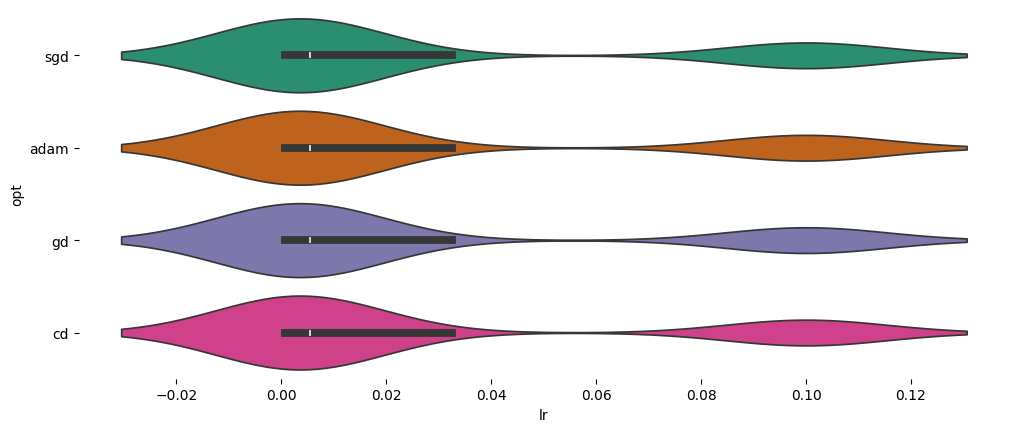

In [6]:
# @title opt vs lr

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_results['opt'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_results, x='lr', y='opt', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [5]:
# prompt: download results

# Save the DataFrame to a CSV file
df_results.to_csv('regression_results.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('regression_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
display(df_results.iloc[:50,:])

,model,lr,opt,rmse
173,GradientBoostingRegressor,0.10,sgd,2.75
174,GradientBoostingRegressor,0.10,adam,2.77
162,GradientBoostingRegressor,0.00,adam,2.77
160,GradientBoostingRegressor,0.00,gd,2.77
164,GradientBoostingRegressor,0.00,gd,2.77
163,GradientBoostingRegressor,0.00,cd,2.77
161,GradientBoostingRegressor,0.00,sgd,2.77
167,GradientBoostingRegressor,0.00,cd,2.77
166,GradientBoostingRegressor,0.00,adam,2.77
165,GradientBoostingRegressor,0.00,sgd,2.77
